# Digit Recognizer

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from keras import layers as L

## Read the data

In [66]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

In [67]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transform the data

In [68]:
x_train = train.drop("label", axis=1).astype("float").values.reshape(-1, 28, 28, 1)
y_train = train.label.astype("float")
x_test = test.astype("float").values.reshape(-1, 28, 28, 1)

## Shape of the data

In [69]:
print("Shapes")
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)

Shapes
x_train : (42000, 28, 28, 1)
x_test : (28000, 28, 28, 1)
y_train : (42000,)


## One Hot Encoding

In [70]:
print("Shape before one hot encoding : ", y_train.shape)
print(y_train[:5])
print()
y_train_ohe = tf.keras.utils.to_categorical(y_train, 10)
print("Shape after one hot encoding  :", y_train_ohe.shape)
print(y_train_ohe[:5])

Shape before one hot encoding :  (42000,)
0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float64

Shape after one hot encoding  : (42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## See what the images look like

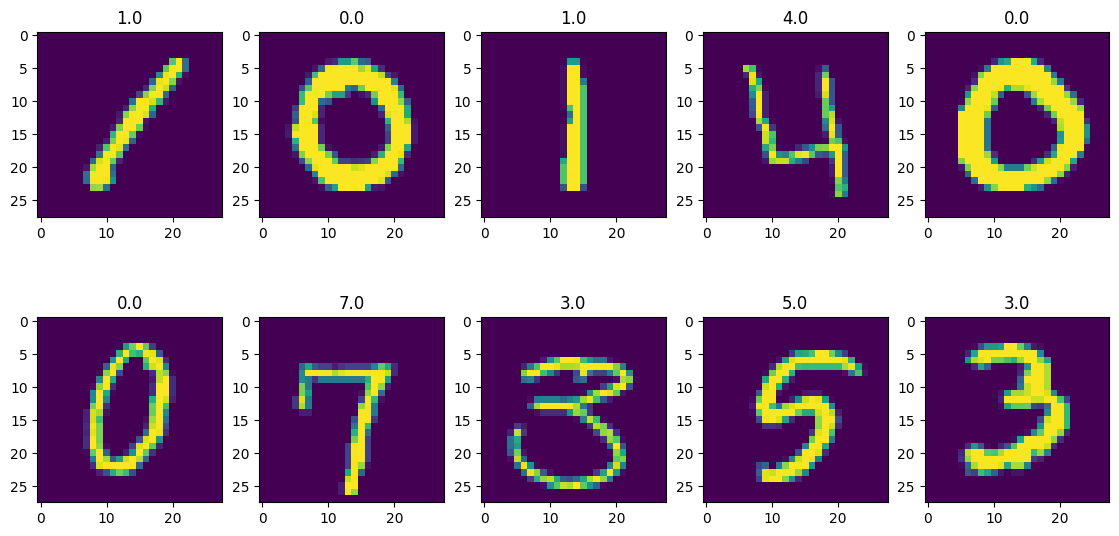

In [71]:
def show_images(index):
    for i in range(0, 10):
        plt.subplot(2, 5, i + 1)
        plt.subplots_adjust(right=1.8, top=1.2)

        k = (index + i) % len(x_train)
        plt.imshow(x_train[k])
        plt.title(y_train[k])

def show_test_images(index, numbers):
    for i in range(0, 10):
        plt.subplot(2, 5, i + 1)
        plt.subplots_adjust(right=1.8, top=1.2)

        k = (index + i) % len(x_test)
        plt.title(numbers[k])
        plt.imshow(x_test[k])

show_images(0)

## Model Definition

In [72]:
model = tf.keras.models.Sequential([
    L.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=x_train.shape[1:]),
    L.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    # L.MaxPooling2D(pool_size=2, strides=2),

    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    # L.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # L.Dropout(0.25),

    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # L.Dropout(0.25),
    
    L.Flatten(),
    L.Dense(256, activation="relu"),
    L.Dense(256, activation="relu"),
    # L.Dropout(0.5),
    
    L.Dense(10, activation="softmax")
])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0

In [74]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") > 0.999:
            print("Reached 99.9% accuracy - Stopped training!")
            self.model.stop_training = True

callback = MyCallback()

In [77]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, name="Adam")
model.compile(optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [78]:
model.fit(x_train, y_train_ohe, batch_size=100, epochs=20, callbacks=[callback])

Epoch 1/20
420/420 [==============================] - 254s 602ms/step - loss: 0.2578 - accuracy: 0.9342
Epoch 2/20
420/420 [==============================] - 256s 611ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 3/20
420/420 [==============================] - 250s 595ms/step - loss: 0.0296 - accuracy: 0.9911
Epoch 4/20
420/420 [==============================] - 241s 573ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 5/20
420/420 [==============================] - 2526s 6s/step - loss: 0.0199 - accuracy: 0.9934
Epoch 6/20
420/420 [==============================] - 237s 565ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 7/20
420/420 [==============================] - 239s 570ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 8/20
420/420 [==============================] - 236s 563ms/step - loss: 0.0119 - accuracy: 0.9961
Epoch 9/20
420/420 [==============================] - 235s 560ms/step - loss: 0.0103 - accuracy: 0.9964
Epoch 10/20
420/420 [==============================] - 235s 559ms/

In [79]:
model.save("model.h5")

## Get the predicted numbers

In [80]:
model = tf.keras.models.load_model("model.h5")
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, name="Adam")
model.compile(optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

results = model.predict(x_test)

875/875 [==============================] - 21s 24ms/step


In [81]:
numbers = np.argmax(results, axis=1)
numbers[:5]

array([2, 0, 9, 9, 3], dtype=int64)

## Check the performance of the model

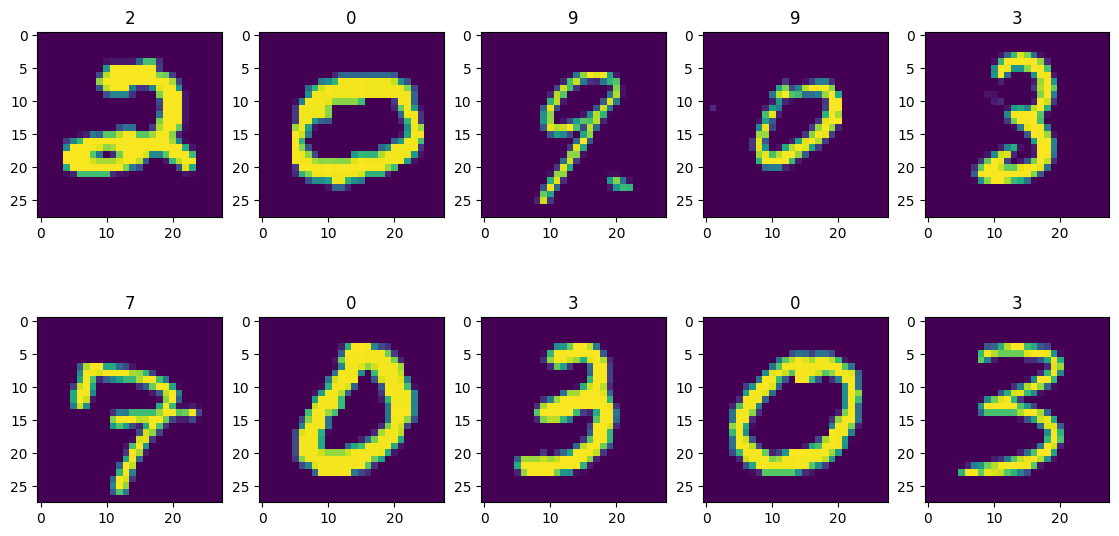

In [82]:
show_test_images(0, numbers)

In [92]:
results[:5]

array([[3.7141008e-17, 1.3636350e-15, 1.0000000e+00, 1.2991649e-13,
        1.2552389e-14, 4.5353734e-19, 3.0532004e-18, 3.5851874e-13,
        2.1899190e-12, 9.3375331e-17],
       [1.0000000e+00, 3.1905533e-15, 7.2275470e-11, 3.9983254e-15,
        3.6706011e-12, 2.9037597e-10, 6.9193908e-12, 4.9252345e-11,
        4.9510351e-10, 1.3043058e-11],
       [2.7017832e-14, 2.0275766e-13, 8.1996302e-12, 2.9702245e-16,
        1.5866534e-09, 4.1940921e-16, 2.3260780e-17, 4.7186600e-15,
        2.5281224e-07, 9.9999976e-01],
       [5.7404391e-02, 1.9329666e-11, 5.7690340e-07, 2.4375787e-10,
        1.0147576e-05, 3.3772437e-08, 2.3572047e-09, 3.7728860e-05,
        3.2022845e-07, 9.4254678e-01],
       [7.5180319e-13, 4.1945775e-10, 1.7517389e-09, 9.9998081e-01,
        7.6983029e-12, 8.4317130e-11, 3.6129248e-14, 1.6935572e-10,
        1.9178364e-05, 9.7762354e-12]], dtype=float32)

In [94]:
confused_data = []

for i, probs in enumerate(results):
    lot = [(n, p) for n, p in enumerate(probs) if p > 0.1]
    if len(lot) > 1:
        confused_data.append((i, (dict((x, y) for x, y in lot))))

In [95]:
print(len(confused_data))
confused_data[:5]

313


[(94, {0: 0.19491312, 1: 0.77294254}),
 (128, {7: 0.79418075, 8: 0.20335534}),
 (275, {3: 0.5120335, 5: 0.45471808}),
 (409, {5: 0.7941549, 6: 0.20581442}),
 (450, {5: 0.39283255, 9: 0.6071546})]

[40, 45, 298, 43, 80, 180, 286, 144, 127, 303]
--------------------------------------------------------------------


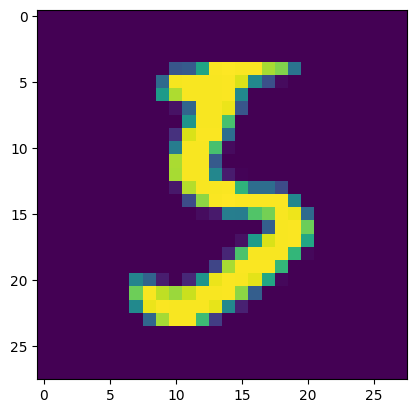

Number =  3
Probability =  0.16340536

Number =  5
Probability =  0.8348994

--------------------------------------------------------------------
--------------------------------------------------------------------


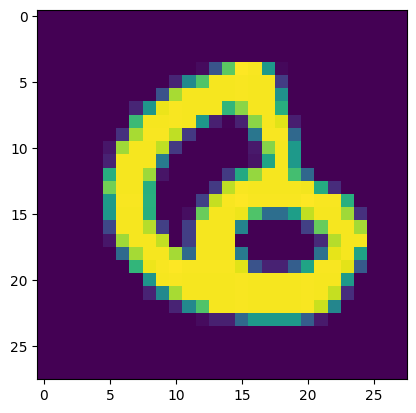

Number =  0
Probability =  0.14266695

Number =  8
Probability =  0.78786

--------------------------------------------------------------------
--------------------------------------------------------------------


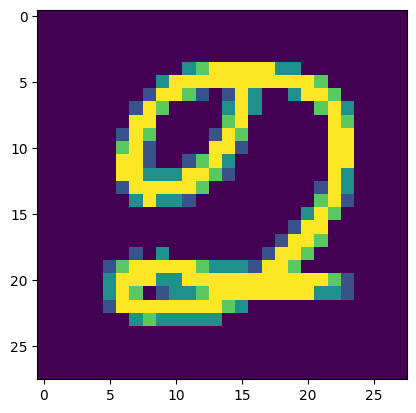

Number =  2
Probability =  0.8932843

Number =  8
Probability =  0.10662952

--------------------------------------------------------------------
--------------------------------------------------------------------


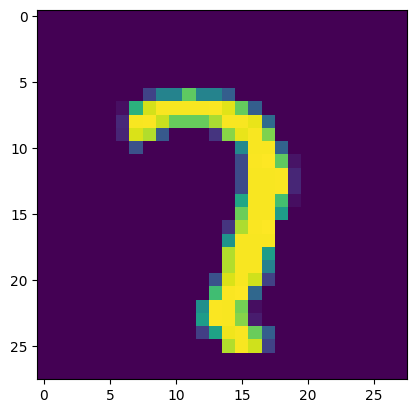

Number =  2
Probability =  0.22350563

Number =  7
Probability =  0.77648914

--------------------------------------------------------------------
--------------------------------------------------------------------


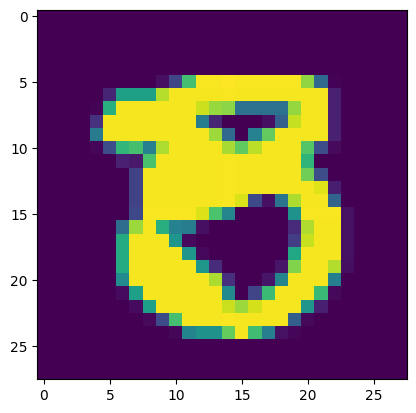

Number =  3
Probability =  0.283392

Number =  8
Probability =  0.7107583

--------------------------------------------------------------------
--------------------------------------------------------------------


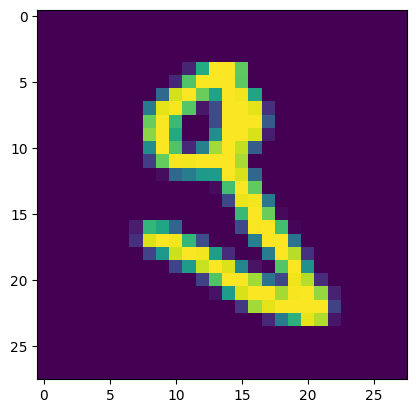

Number =  8
Probability =  0.25339735

Number =  9
Probability =  0.6699484

--------------------------------------------------------------------
--------------------------------------------------------------------


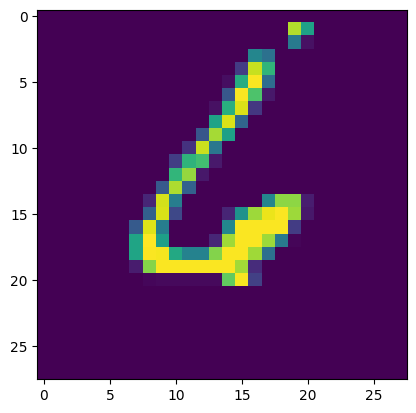

Number =  4
Probability =  0.16001557

Number =  6
Probability =  0.83990777

--------------------------------------------------------------------
--------------------------------------------------------------------


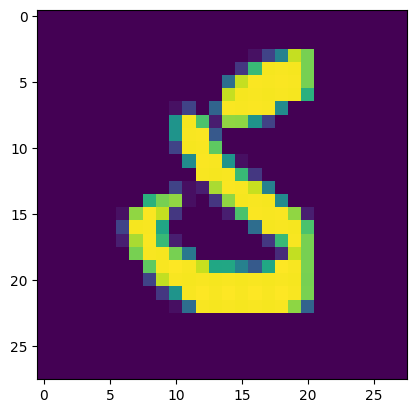

Number =  5
Probability =  0.8658193

Number =  6
Probability =  0.13386936

--------------------------------------------------------------------
--------------------------------------------------------------------


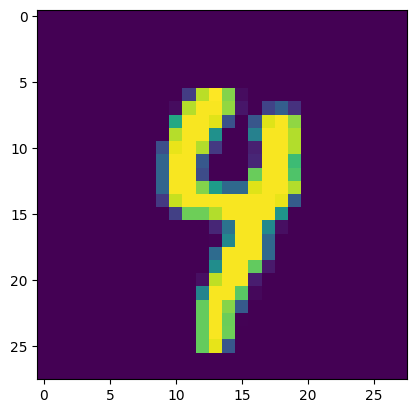

Number =  4
Probability =  0.15249816

Number =  9
Probability =  0.8474888

--------------------------------------------------------------------
--------------------------------------------------------------------


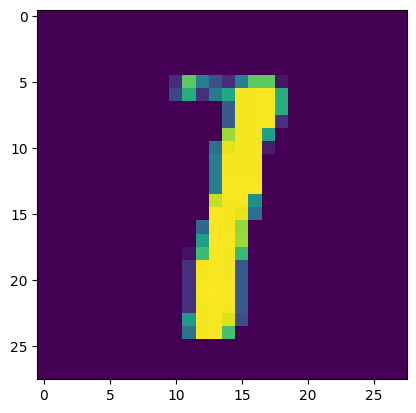

Number =  1
Probability =  0.22144198

Number =  7
Probability =  0.77840084

--------------------------------------------------------------------


In [101]:
def show_confusion(k):
    samples = random.sample(range(0, len(confused_data)), k)
    print(samples)

    for i in samples:
        print("--------------------------------------------------------------------")
        tpl = confused_data[i]
        index = tpl[0]
        dct = tpl[1]

        plt.imshow(x_test[index])
        plt.show()

        for k, v in dct.items():
            print("Number = ", k)
            print("Probability = ", v)
            print()
        print("--------------------------------------------------------------------")
        
show_confusion(10)

## Submission

In [102]:
submission = pd.concat([pd.Series(range(1, len(sample) + 1), name="ImageId"), pd.Series(numbers, name="Label")], axis=1)
submission.to_csv("submission.csv", index=False)